# CS 155 Miniproject 2

## Karthik Karnik, Anvita Mishra, Kapil Sinha

## Basic Visualizations

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.sparse as sp
from scipy.sparse.linalg import svds
from scipy.sparse import csc_matrix
from sklearn.metrics import mean_squared_error
sns.set(color_codes=True)

In [2]:
# encoding must be latin-1 to handle the format of this data
data = np.loadtxt('data/data.txt', delimiter='\t', encoding='latin-1')
# dtype must be None for the function to infer type based on the column
movies = np.genfromtxt('data/movies.txt', delimiter='\t', encoding='latin-1', dtype=None)

In [3]:
train = np.loadtxt('data/train.txt', delimiter='\t', encoding='latin-1')
test = np.loadtxt('data/test.txt', delimiter='\t', encoding='latin-1')

In [5]:
data_df = pd.DataFrame(data)
data_df.columns = ["User ID", "Movie ID", "Rating"]
movies_df = pd.DataFrame(movies)
movies_df.columns = ["Movie ID", "Movie Title", "Unknown", "Action", "Adventure", "Animation", \
                     "Childrens", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", \
                     "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
train_df = pd.DataFrame(train)
train_df.columns = ["User ID", "Movie ID", "Rating"]
test_df = pd.DataFrame(test)
test_df.columns = ["User ID", "Movie ID", "Rating"]

In [6]:
data_df.head()

,User ID,Movie ID,Rating
0,196.0,242.0,3.0
1,186.0,302.0,3.0
2,22.0,377.0,1.0
3,244.0,51.0,2.0
4,166.0,346.0,1.0


In [7]:
movies_df.head()

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


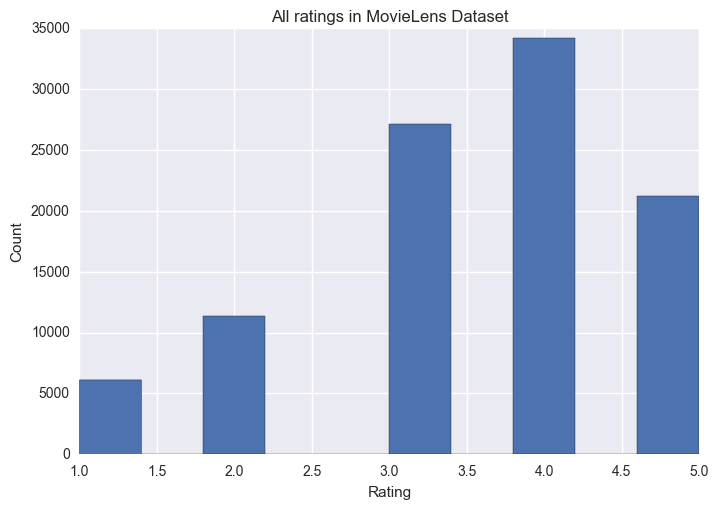

In [8]:
#sns.distplot(data[:,2]) # Equivalent to sns.distplot(data_df["Rating"])
plt.hist(data_df["Rating"])
plt.title("All ratings in MovieLens Dataset")
plt.xlabel("Rating")
plt.ylabel("Count")

In [11]:
import collections

# Returns dictionary whose keys are array elements and values are their corresponding frequencies
def CountFrequency(arr):
    return dict(collections.Counter(arr))

def kLargest(arr, k):
    arr.sort(reverse=True)
    return arr[0:k]

freq = CountFrequency(data_df["Movie ID"])
ten_largest = kLargest(list(freq.values()), 10)
inv_map = {v: k for k, v in freq.items()}
popular_movies = [inv_map[x] for x in ten_largest]
# popular_movies: [50.0, 258.0, 100.0, 181.0, 294.0, 286.0, 288.0, 1.0, 300.0, 121.0]
most_popular_ratings = data_df[np.isin(data_df["Movie ID"], popular_movies)]

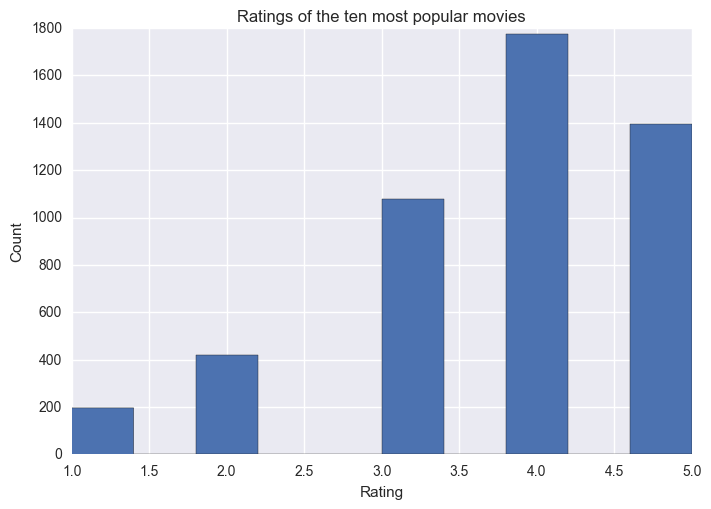

In [12]:
plt.hist(most_popular_ratings["Rating"])
plt.title("Ratings of the ten most popular movies")
plt.xlabel("Rating")
plt.ylabel("Count")

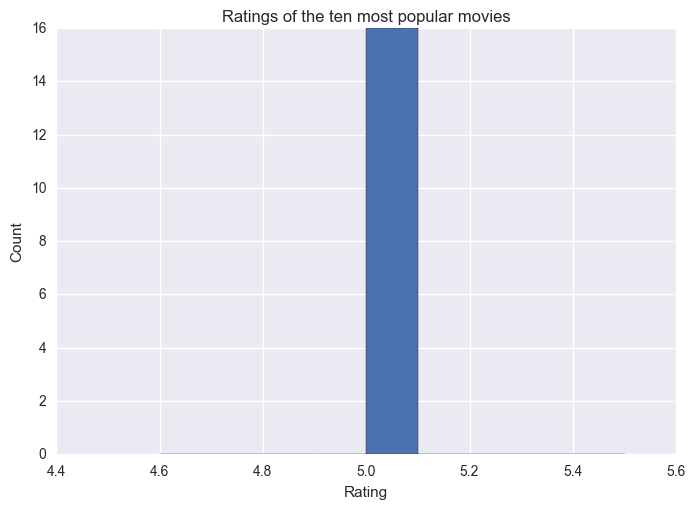

In [13]:
avg_ratings_df = data_df.groupby('Movie ID', as_index=False)['Rating'].mean()
best_ratings = kLargest(list(avg_ratings_df["Rating"]), 10)
best_movie_ids = avg_ratings_df[np.isin(avg_ratings_df["Rating"], best_ratings)]["Movie ID"]
best_movies = data_df[np.isin(data_df["Movie ID"], best_movie_ids)]
plt.hist(best_movies["Rating"])
plt.title("Ratings of the ten most popular movies")
plt.xlabel("Rating")
plt.ylabel("Count")

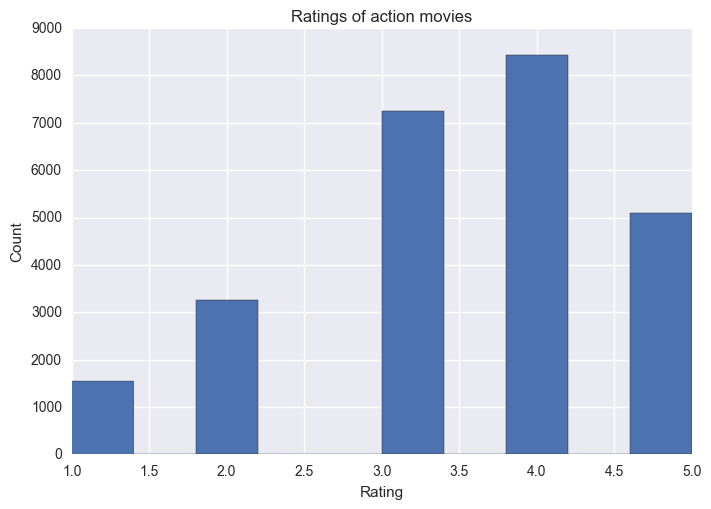

In [14]:
action_movie_ids = list(movies_df[movies_df["Action"] == 1]["Movie ID"])
action_movies = data_df[np.isin(data_df["Movie ID"], action_movie_ids)]
plt.hist(action_movies["Rating"])
plt.title("Ratings of action movies")
plt.xlabel("Rating")
plt.ylabel("Count")

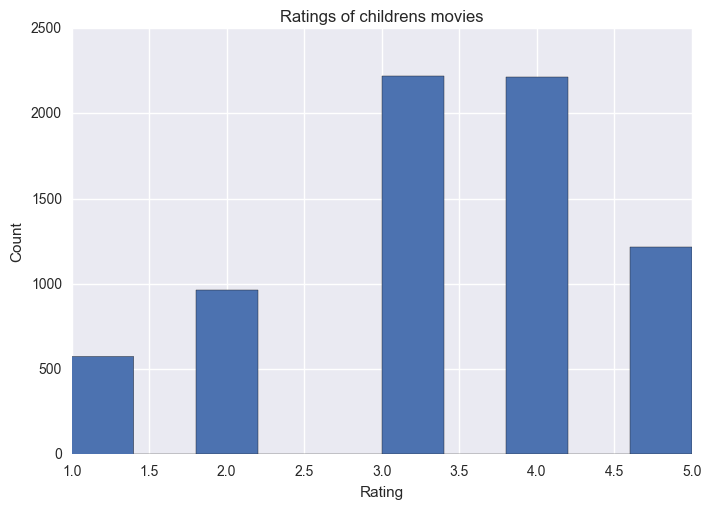

In [15]:
childrens_movie_ids = list(movies_df[movies_df["Childrens"] == 1]["Movie ID"])
childrens_movies = data_df[np.isin(data_df["Movie ID"], childrens_movie_ids)]
plt.hist(childrens_movies["Rating"])
plt.title("Ratings of childrens movies")
plt.xlabel("Rating")
plt.ylabel("Count")

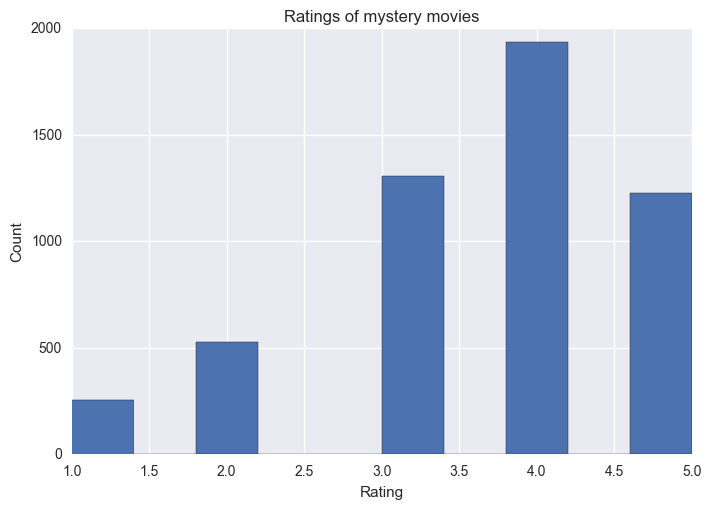

In [16]:
mystery_movie_ids = list(movies_df[movies_df["Mystery"] == 1]["Movie ID"])
mystery_movies = data_df[np.isin(data_df["Movie ID"], mystery_movie_ids)]
plt.hist(mystery_movies["Rating"])
plt.title("Ratings of mystery movies")
plt.xlabel("Rating")
plt.ylabel("Count")

In [ ]:
ratings_mat = 

In [ ]:
U, S, V = np.linalg.svd(A)

In [18]:
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Helper function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        print (movie_data[movie_data.movie_id == id].title.values[0])

In [19]:
k = 50
movie_id = 1 # Grab an id from movies.dat
top_n = 10

sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id - 1, top_n)
print_similar_movies(movie_df, movie_id, indexes)

NameError: name 'V' is not defined

# Off the shelf SVD implementation

## SVD with scipy.sparse.linalg.svds

In [27]:
movies_df

,Movie ID,Movie Title,Unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
train_df

,User ID,Movie ID,Rating
0,196.0,242.0,3.0
1,186.0,302.0,3.0
2,22.0,377.0,1.0
3,166.0,346.0,1.0
4,298.0,474.0,4.0
5,115.0,265.0,2.0
6,253.0,465.0,5.0
7,305.0,451.0,3.0
8,6.0,86.0,3.0
9,62.0,257.0,2.0


In [33]:
movies_df.values

array([[1, 'Toy Story (1995)', 0, ..., 0, 0, 0],
       [2, 'GoldenEye (1995)', 0, ..., 1, 0, 0],
       [3, 'Four Rooms (1995)', 0, ..., 1, 0, 0],
       ...,
       [1680, 'Sliding Doors (1998)', 0, ..., 0, 0, 0],
       [1681, 'You So Crazy (1994)', 0, ..., 0, 0, 0],
       [1682, 'Scream of Stone (Schrei aus Stein) (1991)', 0, ..., 0, 0,
        0]], dtype=object)

In [42]:
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return np.sqrt(mean_squared_error(prediction, ground_truth))

In [118]:
train_df

,User ID,Movie ID,Rating
0,196.0,242.0,3.0
1,186.0,302.0,3.0
2,22.0,377.0,1.0
3,166.0,346.0,1.0
4,298.0,474.0,4.0
5,115.0,265.0,2.0
6,253.0,465.0,5.0
7,305.0,451.0,3.0
8,6.0,86.0,3.0
9,62.0,257.0,2.0


In [152]:
Y = csc_matrix((train_df["Rating"], (train_df['User ID'], train_df['Movie ID'])), \
               shape=(len(train_df['User ID']), len(train_df['Movie ID'])))

In [154]:
np.asarray(Y)
Y

<90000x90000 sparse matrix of type '<class 'numpy.float64'>'
	with 90000 stored elements in Compressed Sparse Column format>

In [141]:
Y = train_df.pivot(index='User ID', columns='Movie ID', values='Rating')
Y = Y.fillna(0)
Y

Movie ID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,1672.0,1673.0,1674.0,1675.0,1676.0,1677.0,1679.0,1680.0,1681.0,1682.0
User ID,,,,,,,,,,,,,,,,,,,,,
1.0,5.0,3.0,4.0,0.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
Y.values

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [159]:
u, s, vt = svds(Y, k = 20)
s_diag_matrix=np.diag(s)


In [160]:
u, s, vt

(array([[-3.02194142e-20,  3.38252425e-20, -6.01246845e-21, ...,
         -2.93782889e-19, -5.04419210e-19,  2.01740907e-20],
        [ 2.94571959e-02,  2.87272708e-02, -9.95826680e-02, ...,
         -5.32885713e-03,  6.46451519e-03, -6.85800924e-02],
        [-2.12670716e-02, -1.64849227e-02, -3.18759478e-04, ...,
          5.16252339e-02, -4.94741165e-02, -1.45651620e-02],
        ...,
        [ 5.10672860e-21,  1.86855727e-20, -4.02267562e-21, ...,
         -1.88235644e-19, -3.44381244e-19,  1.43796728e-20],
        [ 2.06874114e-20, -2.49542984e-20,  6.11872243e-21, ...,
          2.15426187e-19,  3.85764697e-19, -8.57173835e-21],
        [ 4.59993238e-20, -3.89100935e-20,  8.25576626e-21, ...,
          3.06271146e-19,  5.01562399e-19, -7.58071467e-21]]),
 array([ 72.31885867,  72.74790337,  75.29228314,  75.57972547,
         77.27092044,  78.92930221,  80.16917476,  85.54236107,
         86.77565413,  87.95460141,  92.42204896,  99.00370917,
        112.383476  , 116.33861576, 1

In [161]:
u.shape, s.shape, vt.shape

((90000, 20), (20,), (20, 90000))

In [56]:
train_df.values

array([[1.96e+02, 2.42e+02, 3.00e+00],
       [1.86e+02, 3.02e+02, 3.00e+00],
       [2.20e+01, 3.77e+02, 1.00e+00],
       ...,
       [7.16e+02, 2.04e+02, 5.00e+00],
       [2.76e+02, 1.09e+03, 1.00e+00],
       [1.20e+01, 2.03e+02, 3.00e+00]])

In [57]:
train_df.values.T

array([[1.96e+02, 1.86e+02, 2.20e+01, ..., 7.16e+02, 2.76e+02, 1.20e+01],
       [2.42e+02, 3.02e+02, 3.77e+02, ..., 2.04e+02, 1.09e+03, 2.03e+02],
       [3.00e+00, 3.00e+00, 1.00e+00, ..., 5.00e+00, 1.00e+00, 3.00e+00]])